In [26]:

#Vince Garcia, Samuel Scott
#MS ADS 500B Final Project
#Dataset 1 - European Banks
#Python
# Version 1.00 -- 11/5/2025
# Version 1.01 -- 11/10/2025 --Converted initial dataframe into series
# Version 1.02 -- 11/10/2025 -- Separated into 17 columns
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as stat
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


#get data from file
#Source: Qarabaqi, Paris (2025). Personal Communication.
data = pd.read_csv("/bank_marketing.csv", sep= ";")

#Find the amount of columns in the original dataframe
print(len(data.columns))

#Print dataframe object
print(data)



17
        age           job   marital  education default  balance housing loan  \
0      58.0    management   married   tertiary      no     2143     yes   no   
1      44.0    technician    single  secondary      no       29     yes   no   
2      33.0  entrepreneur   married  secondary      no        2     yes  yes   
3      47.0   blue-collar   married    unknown      no     1506     yes   no   
4      33.0       unknown    single    unknown      no        1      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
45206  51.0    technician   married   tertiary      no      825      no   no   
45207  71.0       retired  divorced    primary      no     1729      no   no   
45208  72.0       retired   married  secondary      no     5715      no   no   
45209  57.0   blue-collar   married  secondary      no      668      no   no   
45210  37.0  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duratio

In [27]:
from pandas.core.dtypes.missing import isnull
#Function: CheckforMissing
#Description: Find the null values and replace them
#Version: 1.00
#Using the isnull() function from pandas to count the number of null values
#source:https://www.geeksforgeeks.org/python/python-pandas-isnull-and-notnull/



if pd.isnull(data["age"]).any():
  #Using a central tendency to replace missing ages
  data["age"] = data["age"].fillna(data["age"].mean())
if pd.isnull(data["job"]).any():
  #Using a filler to replace missing jobs
  data["job"] = data["job"].fillna("Unknown")
if pd.isnull(data['marital']).any():
  #Using a filler to replace missing marital statuses
  data["marital"] = data["marital"].fillna("Unknown")
if pd.isnull(data['education']).any():
  #Using a filler to replace missing educational statuses
  data["education"] = data["education"].fillna("Unknown")
if pd.isnull(data['default']).any():
  #Using a filler to replace missing default status
  data["default"] = data["default"].fillna("Unknown")
if pd.isnull(data["balance"]).any():
  #Using a central tendency to replace missing balances
  data["balance"] = data["balance"].fillna(data["balance"].mean())
if pd.isnull(data["housing"]).any():
  #Using a filler to replace missing housing data
  data["housing"] = data["housing"].fillna("Unknown")
if pd.isnull(data["loan"]).any():
  #Using a filler to replace missing loan data
  data["loan"] = data["loan"].fillna("Unknown")
if pd.isnull(data['contact']).any():
  #Using a filler to replace missing loan data
  data["contact"] = data["contact"].fillna("Unknown")
if pd.isnull(data['day']).any():
  #Using a filler to replace missing days
  data["day"] = data["day"].fillna("Unknown")
if pd.isnull(data['month']).any():
  #Using a filler to replace missing months
  data["month"] = data["month"].fillna("Unknown")
if pd.isnull(data['duration']).any():
  #Using a central tendency to replace missing durations
  data["duration"] = data["duration"].fillna(data["duration"].mean())
if pd.isnull(data['campaign']).any():
  #Using a filler to replace missing campaigns
  data["campaign"] = data["campaign"].fillna("Unknown")
if pd.isnull(data['pdays']).any():
  #Using a central tendency to replace missing pdays
  data["pdays"] = data["pdays"].fillna(data["pdays"].mean())
if pd.isnull(data['previous']).any():
  #Using a central tendency to replace missing previous
  data["previous"] = data["previous"].fillna(data["previous"].mean())
if pd.isnull(data['poutcome']).any():
  #Using a filler to replace missing poutcome
  data["poutcome"] = data["poutcome"].fillna("Unknown")
if pd.isnull(data["deposit"]).any():
  #Using a filler to replace missing poutcome
  data["deposit"] = data["deposit"].fillna("Unknown")

#reassign missingvalues
missingValues = pd.isnull(data).sum()

#Print missing values
print(missingValues)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Average age of customers called by marketing campaign

In [28]:
int(data['age'].mean())

40

Normalizing balance column

In [29]:
max_bal = max(data['balance'])
max_bal
normalize_bal = data['balance'] // max_bal

In [30]:
# Max normalized value
normalize_bal = data['balance'] / max_bal

In [31]:
#How many bins for our dataset?
int(math.sqrt(len(data)))

212

Does the month of the year affect clients response to subscribing to the term deposit?

In [32]:
# potential feature construction
# count of last contact call month marketing campaign gave to each customer
jan = data['month'] == 'jan'
jan = data[jan].count()['month']
feb = data['month'] == 'feb'
feb = data[feb].count()['month']
mar = data['month'] == 'mar'
mar = data[mar].count()['month']
apr = data['month'] == 'apr'
apr = data[apr].count()['month']
may = data['month'] == 'may'
may = data[may].count()['month']
jun = data['month'] == 'jun'
jun = data[jun].count()['month']
jul = data['month'] == 'jul'
jul = data[jul].count()['month']
aug = data['month'] == 'aug'
aug = data[aug].count()['month']
sep = data['month'] == 'sep'
sep = data[sep].count()['month']
oct = data['month'] == 'oct'
oct = data[oct].count()['month']
nov = data['month'] == 'nov'
nov = data[nov].count()['month']
dec = data['month'] == 'dec'
dec = data[dec].count()['month']

month_names =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_count = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]
month_count = pd.Series(month_count, index=month_names)
print(month_count.sort_values(ascending=False))

May          13766
July          6895
August        6247
June          5341
November      3970
April         2932
February      2649
January       1403
October        738
September      579
March          477
December       214
dtype: int64


May is the month with the most client calls and this is for several reasons. Firstly, the data date ranges from May 2008 - November 2010, so months from December - April only have two years of data while the rest of the months have three years of data. Another reason for heavy client calls is May is the month before people tend to plan trips and vacations so the banks have more leverage with promotions and deals to get customers to say yes. Let's see if timing is a strategic tactic banks use or are the calls not getting the results the banks desire.

In [33]:
may_deposits = data['month'] == 'may' # Retrieve may client calls only
may_deposits = data[may_deposits]
success_may_count = may_deposits['deposit'] == 'yes' # Retrieve only when clients responded with yes
success_may_count = success_may_count.sum() # Sum up all True values in the Series to get result

#Getting a ratio is easier to understand:
res = success_may_count / len(may_deposits) * 100
print(f'{res:.2f}% of May clients responding with yes')

6.72% of May clients responding with yes


6.72 percent of May clients responding with yes, that does not seem like a high enough success rate. Do other months have higher percentages, or does the larger sample size of clients in May justify the percentage?

In [34]:
month_count.reset_index(drop=True, inplace=True) #use gemini to find a way to reset indexes for this Series for iteration purposes
#print(month_count)
month_names =["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
for m in range (len(month_names)):
    month = month_names[m]
    month_deposits = data['month'] == month
    month_deposits = data[month_deposits]
    success_month_count = month_deposits['deposit'] == 'yes'
    success_month_count = success_month_count.sum()
    res = success_month_count / len(month_deposits) * 100
    print(f'{month_names[m]:} {res:.2f}% of clients responding with yes each month')


jan 10.12% of clients responding with yes each month
feb 16.65% of clients responding with yes each month
mar 51.99% of clients responding with yes each month
apr 19.68% of clients responding with yes each month
may 6.72% of clients responding with yes each month
jun 10.22% of clients responding with yes each month
jul 9.09% of clients responding with yes each month
aug 11.01% of clients responding with yes each month
sep 46.46% of clients responding with yes each month
oct 43.77% of clients responding with yes each month
nov 10.15% of clients responding with yes each month
dec 46.73% of clients responding with yes each month


May had the lowest percentage of calls that said yes. Does that mean that the timing works well for clients to say yes, there does not seem to be a strong correlation. Several factors to look into: Firstly, May was one of the months trialed three years in a row instead of two so inevitably that month would have more data than months Dec-Apr which only had two year trials. This would decrease the percentages because of the larger sample size. What about March, it has the highest percentage at 52%. With March, it was one of the months trialed only twice and it had the second fewest client calls making it easier to achieve a higher percentage, more extensive sampling would be needed to confirm if March is the best month to call clients. September, October, and December also had high percentages of yes responses with 3 year trialed sample, but yet like March, had some of the fewer client calls. Overall, this feature construction does not seem to be a strong factor in client responses registering a 'yes' response.  


###Are longer calls associated with a client more likely subscribing to a term deposit?

In [35]:
#create boolean mask of those who said 'yes'
deposited = data['deposit'] == "yes"
deposited = data[deposited]
print(deposited.count()['deposit'])

5289


In [36]:
#those who said 'no'
no_deposit = data['deposit'] == "no"
no_deposit = data[no_deposit]
print(no_deposit.count()['deposit'])

39922


In [37]:
print(f'Mean call duration in seconds (yes deposit): {deposited['duration'].mean():.2f}')
print(f'Mean call duration in seconds (no deposit): {no_deposit['duration'].mean():.2f}')

Mean call duration in seconds (yes deposit): 537.29
Mean call duration in seconds (no deposit): 221.18


Based on the mean longer calls do tend to get more subscriptions to the deposit. However lets look at more evidence.

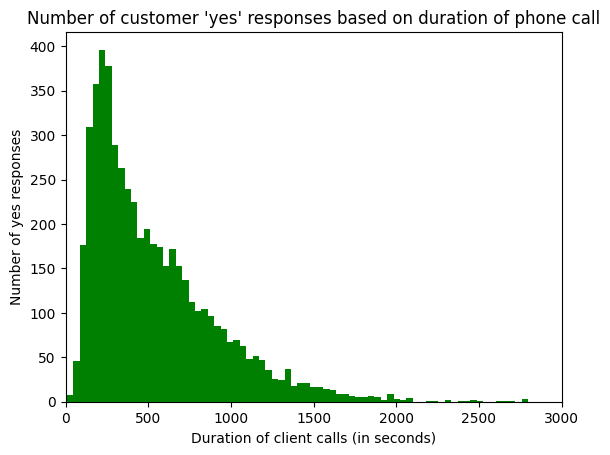

In [38]:
plt.hist(deposited['duration'], bins=100, color='green')
plt.xlim([0,3000])
plt.xlabel('Duration of client calls (in seconds)')
plt.ylabel('Number of yes responses')
plt.title("Number of customer 'yes' responses based on duration of phone call")
plt.show()

This histogram shows that the sweet spot of duration for yes responses is around 350-400 seconds or calls that are around 5-6 minutes. This is a positive skew histogram with high variability as some yes calls got answer in the 2000 second interval. It is also difficult to land a yes if the call is less than a minute long too.

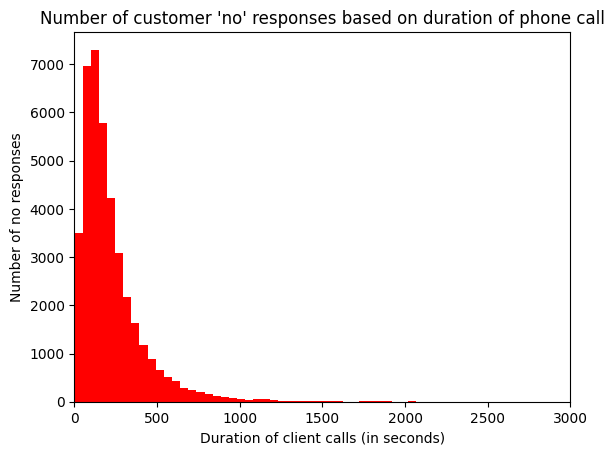

In [39]:
plt.hist(no_deposit['duration'], bins=100, color='red')
plt.xlim([0,3000])
plt.xlabel('Duration of client calls (in seconds)')
plt.ylabel('Number of no responses')
plt.title("Number of customer 'no' responses based on duration of phone call")
plt.show()

This histograms shows all the no answers to the duration. Although there were about 6x as many no answers as to yes answers this histogram also shows a positive skew. Most of the no saying clients had calls from the bank that were relatively short in duration, leading to evidence that shorter calls are more likey to be no from customers.

Reducing Redundant Data

In [40]:
# remove duplicates
data = data.drop_duplicates()
print("Duplicates removes.")


#drop columns where all values are identical
zero_var_cols = [col for col in data.columns if data[col].nunique() == True]
data = data.drop(columns=zero_var_cols, errors='ignore')
print("Zero-variance columns dropped:", zero_var_cols)

#remove highly correlated columns (correlation > 0.95)
corr_matrix = data.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix (excluding diagonal)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
data = data.drop(columns=high_corr, errors='ignore')

print("Highly correlated columns dropped:", high_corr)

Duplicates removes.
Zero-variance columns dropped: []
Highly correlated columns dropped: []


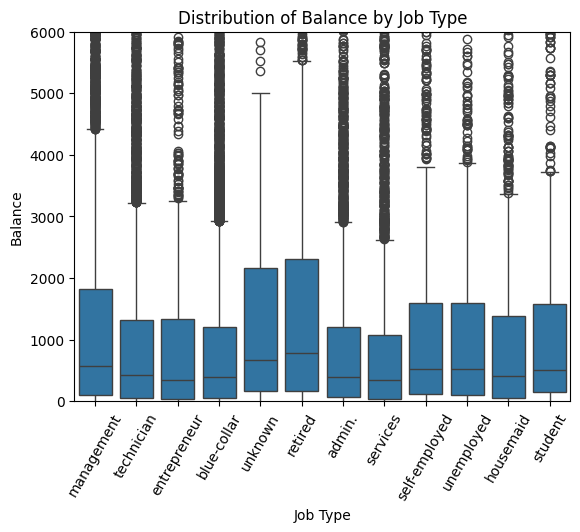

In [41]:
#Box plot of sales by Job Type
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['job'], y=data['balance'], data=data)
plt.title('Distribution of Balance by Job Type') # Added a title for clarity
plt.xlabel('Job Type')
plt.xticks(rotation = 60)
plt.ylabel('Balance')
plt.ylim(0,6000)
plt.ylim(0)
plt.show()

A box-and-whisker plot was generated to represent the distribution of jobs that own accounts with this bank and the spread of their respective balances.

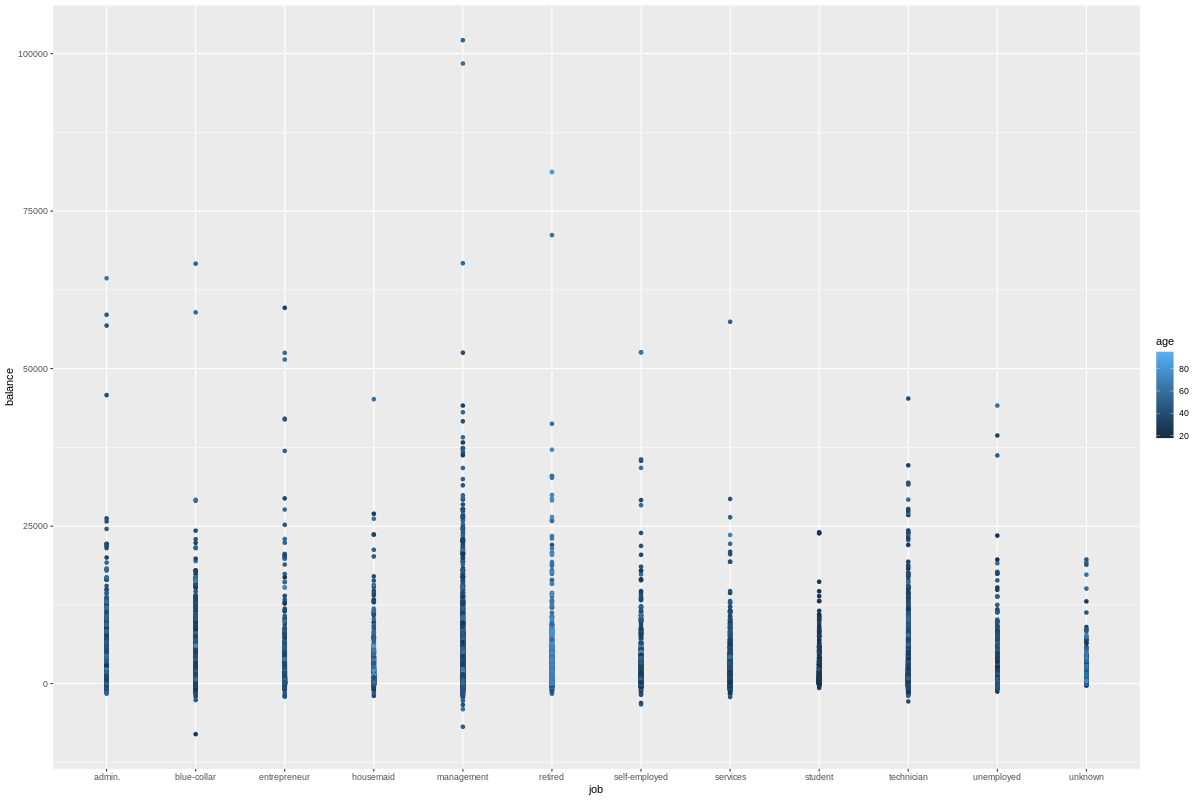

In [42]:
import rpy2.robjects as robjects #Suggested by Gemini
from rpy2.robjects.packages import importr #Suggested by Gemini
from rpy2.robjects import pandas2ri #Suggested by Gemini
from IPython.display import Image, display #Suggested by Gemini
import os #Suggested by Gemini

pandas2ri.activate() #Suggested by Gemini

robjects.globalenv['bank_r'] = data #Suggested by Gemini

robjects.r(''' #Suggested by Gemini
library(ggplot2)
library(datasets) #Suggested by Gemini

# Creating a scatter plot, while coloring the points with deposit
splot <- ggplot(bank_r, aes(job, balance, color = age)) + geom_point()

# Save the plot to a PNG file, #Suggested by Gemini
png("scatter_plot.png", width=1200, height=800) #Suggested by Gemini
print(splot) #Suggested by Gemini
dev.off() #Suggested by Gemini
''')

# Display the saved PNG image, #Suggested by Gemini
if os.path.exists("scatter_plot.png"): #Suggested by Gemini
    display(Image(filename="scatter_plot.png")) #Suggested by Gemini
else:  #Suggested by Gemini
    print("Plot file not found.") #Suggested by Gemini

A Scatter Plot was created using R to display the relationship between the various job types and the account balances. Each point was colored by the age of the account holder. One key takeaway from this graph is that the retirement age trends at ~70-80 years of age. Most occupations listed, other than 'student' which is dispoportionately young, have a reasonable spread of ages. The occupation with the highest range of account balances would be Management.

In [43]:
#New values
binary = {'yes': 1, 'no': 0}
data['deposit'] = data['deposit'].replace(binary)
rankings = {'unknown' : 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3 }
data['education'] = data['education'].replace(rankings)
# print(data['deposit'])
# print(data['education'])

In order to analyze categorical data fairly, the string values stored in the original data were converted to numerical data.

In [44]:
#Correlation values in data set with predictor variables
data.loc[:,['age', 'deposit','duration','education','balance']].corr()

,age,deposit,duration,education,balance
age,1.000000,0.024266,-0.003115,-0.172618,0.096673
deposit,0.024266,1.000000,0.394521,0.051341,0.052838
duration,-0.003115,0.394521,1.000000,0.002554,0.021560
education,-0.172618,0.051341,0.002554,1.000000,0.050572
balance,0.096673,0.052838,0.021560,0.050572,1.000000


A correlation table was made using all of the indicators found in this dataset. The highest correlations were between Deposit and Duration (0.394521) indicating a moderately strong relationship between call times and whether a deposit was made. This information would be crucial for a telemarketing campaign.

In [45]:
# Diagnose Correlations for Variables of Interest

#Datatype of predictors:
#-age -> continuous
#-job -> nominal
#-duration -> continuous
#-education -> ordinal
#-balance -> discrete

predictors = ['age', 'duration', 'education', 'balance'] # (willing to change predictors for better model)
target = ['deposit'] #either yes or no so Logistic Regression
X = data[predictors].values
y = data[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) #training 70%
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.89


To determine the model accuracy, predictors in the form of our indicator variables were used to recreate our model using a 70/30 test split. A logistic regression model was used to test the results against the original data and resulted in 89% accuracy.

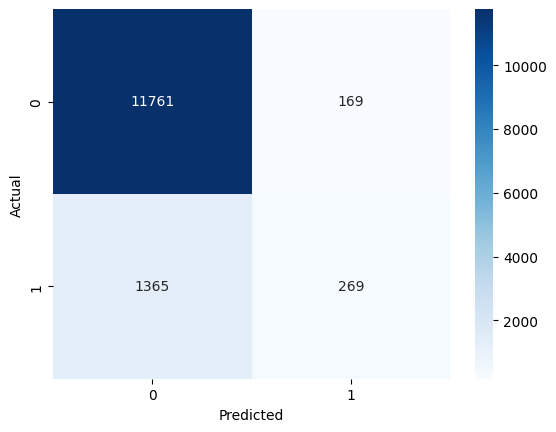

In [46]:
#use copilot to help me plot a heatmap as well as https://seaborn.pydata.org/generated/seaborn.heatmap.html
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The heatmap represents the test data of the banking dataset, which is 13,564 records, or approximately 30 percent of the data. In it, the true positive square with 11,784 shows the correct predictions of deposit values classified as "no" and the true negative square with 260 values show the correct predictions of deposit values classified as "yes". Adding the true positive square and true negative square equates to 12,044. Dividing this by the total 13,564 records, would deliver the accuracy of our model, 89 percent. In other words the heatmap is a visual representation of how our model obtain the accuracy of 89 percent.